In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# import the data set

In [2]:
df=pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:

print('number of rows',df.shape[0])
print('Number of columns',df.shape[1])

number of rows 1338
Number of columns 7


In [8]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

# Checking for null values

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Get statistical information of out dataset

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Conver columns from string to numerical (sex, smoker,region)

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [13]:
#converting sex column into numerical 
df['sex']=df['sex'].map({'female':0,'male':1})

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [15]:
#converting smoker into numerical 
df['smoker']=df['smoker'].map({'yes':1,'no':0})

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [17]:
#checking unique values in region column
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
df['region']=df['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


# INPUT SPLIT 

In [20]:
#STORE FEATURE VARIABLE INTO X AND TARGET INTO Y 
x=df.drop(['charges'], axis=1)
y=df.charges

For the model training we have to store dependent and independent variables saperately

# TRAIN/TEST SPLIT

1. SPLIT DATA INTO TWO PARTS: A TRAINING SET  AND TEST SET
2. TRAIN THE MODEL ON TRAINING SET
3. TEST THE  MODEL ON TEST SET

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

In [22]:
x_train

,age,sex,bmi,children,smoker,region
985,44,0,25.800,1,0,1
140,34,1,22.420,2,0,4
405,52,0,38.380,2,0,4
699,23,0,39.270,2,0,2
729,41,0,36.080,1,0,2
...,...,...,...,...,...,...
1058,24,0,39.490,0,0,2
823,44,0,29.810,2,0,2
1147,20,0,31.920,0,0,3
31,18,0,26.315,0,0,4


In [23]:
y_train

985      7624.63000
140     27375.90478
405     11396.90020
699      3500.61230
729      6781.35420
           ...     
1058     2480.97910
823      8219.20390
1147     2261.56880
31       2198.18985
249      4040.55825
Name: charges, Length: 1070, dtype: float64

# Import the Models

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Training

In [25]:
lr=LinearRegression()
lr.fit(x_train,y_train)

svm=SVR()
svm.fit(x_train, y_train)

rf=RandomForestRegressor()
rf.fit(x_train,y_train)

gr = GradientBoostingRegressor()
gr.fit(x_train,y_train)


GradientBoostingRegressor()

# PREDICTION ON TEST DATA

In [37]:
y_pred1=lr.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gr.predict(x_test)

df1=pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [38]:
df1

,Actual,lr,svm,rf,gr
320,4894.75330,5368.498380,9350.824210,6545.065726,5983.125370
4,3866.85520,5628.034899,9339.850157,4166.283572,4153.733168
814,5584.30570,9164.288940,9366.843513,5742.600913,7014.361049
884,4877.98105,4882.943129,9306.237114,8561.781516,8213.883021
999,5267.81815,6121.838318,9363.418596,5187.882834,5887.114070
...,...,...,...,...,...
187,5325.65100,6787.869328,9329.923217,6356.314924,6059.302674
1040,20234.85475,30053.382011,9357.700573,20411.417871,21378.886638
837,11657.71890,11954.588476,9493.196665,11851.484096,12750.342146
134,2457.21115,2917.027780,9289.724104,2924.311064,3752.252852


# COMPARE PERFORMANCE VISUALLY

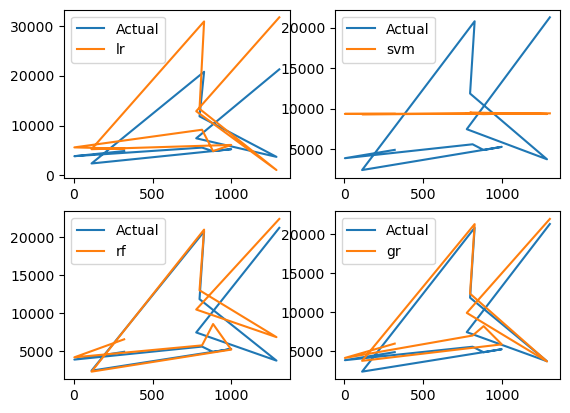

In [44]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[:11],label='Actual')
plt.plot(df1['lr'].iloc[:11],label='lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[:11],label='Actual')
plt.plot(df1['svm'].iloc[:11],label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[:11],label='Actual')
plt.plot(df1['rf'].iloc[:11],label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[:11],label='Actual')
plt.plot(df1['gr'].iloc[:11],label='gr')
plt.legend()

model 4 is very close actual values 

# Evaluate the models

to select the best model

In [47]:
from sklearn import metrics

In [48]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [49]:
print(score1,score2,score3,score4)

0.7772394138227832 -0.0783471845134811 0.869567719846983 0.8925208063615476


In [51]:
#claculating mean absiolute error
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [53]:
print(s1,s2,s3,s4)

4001.0690686989396 8050.894570261419 2521.4528972411244 2319.445367921416


# Predicting Charges For new customer

In [55]:
data={'age':40,
     'sex':1,
     'bmi':40.30,
     'children':4,
     'smoker':1,
     'region':2}
df=pd.DataFrame(data,index=[0])

In [56]:
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [58]:
new_predict=gr.predict(df)

In [59]:
print(new_predict)

[42232.75851968]


# Save The Model using Joblib

In [60]:
gr = GradientBoostingRegressor()
gr.fit(x,y) 

GradientBoostingRegressor()

In [61]:
import joblib

joblib.dump(gr,'model_gbr')

['model_gbr']

In [62]:
model=joblib.load('model_gbr')


In [64]:
model.predict(df)

array([42148.361888])

# END